In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [51]:
#Import data

df = pd.read_csv('teams.csv')
df.tail()

,Rk,Team,Conf,Div,W,L,W/L%,MOV,ORtg,DRtg,NRtg,MOV/A,ORtg/A,DRtg/A,NRtg/A
25,26,Milwaukee Bucks,E,C,33,49,0.402,-4.18,105.06,109.65,-4.59,-3.98,105.32,109.69,-4.37
26,27,Phoenix Suns,W,P,23,59,0.280,-6.66,102.94,109.80,-6.86,-6.32,102.95,109.45,-6.50
27,28,Brooklyn Nets,E,A,21,61,0.256,-7.35,103.74,111.60,-7.86,-7.11,104.06,111.66,-7.61
28,29,Los Angeles Lakers,W,P,17,65,0.207,-9.56,102.29,112.40,-10.12,-8.92,102.49,111.92,-9.43
29,30,Philadelphia 76ers,E,A,10,72,0.122,-10.23,99.65,110.15,-10.50,-9.92,99.83,110.01,-10.18


### Offense vs. defense – which matters more? 

First: offensive rating.

In [52]:
off_x = df['ORtg']
off_y = df['W']

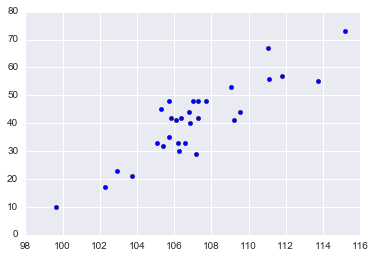

In [53]:
plt.scatter(off_x, off_y)

In [54]:
regOff = ols("W ~ ORtg", data=df).fit()

In [59]:
print regOff.summary()

                            OLS Regression Results                            
Dep. Variable:                      W   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     100.7
Date:                Tue, 20 Sep 2016   Prob (F-statistic):           8.87e-11
Time:                        14:18:26   Log-Likelihood:                -98.097
No. Observations:                  30   AIC:                             200.2
Df Residuals:                      28   BIC:                             203.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   -365.1293     40.480     -9.020      0.0

Second: defensive rating.

In [15]:
def_x = df['DRtg']
def_y = df['W']

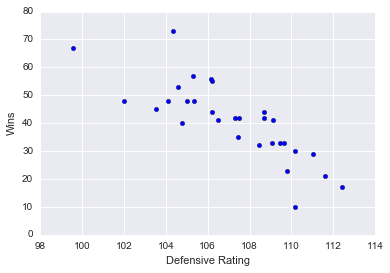

In [19]:
plt.scatter(def_x, def_y)
plt.xlabel('Defensive Rating')
plt.ylabel('Wins')

In [12]:
regDef = ols("W ~ DRtg", data=df).fit()

In [60]:
print regDef.summary()

                            OLS Regression Results                            
Dep. Variable:                      W   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     55.43
Date:                Tue, 20 Sep 2016   Prob (F-statistic):           4.15e-08
Time:                        14:18:30   Log-Likelihood:                -104.60
No. Observations:                  30   AIC:                             213.2
Df Residuals:                      28   BIC:                             216.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    450.1063     54.972      8.188      0.0

Both of these regressions are statistically significant, and show that a better rating means more wins (just that a better rating in defense is a lower number, so the correlation is negative).

Let's draw a residual plot for defensive rating to make sure we chose the right model.

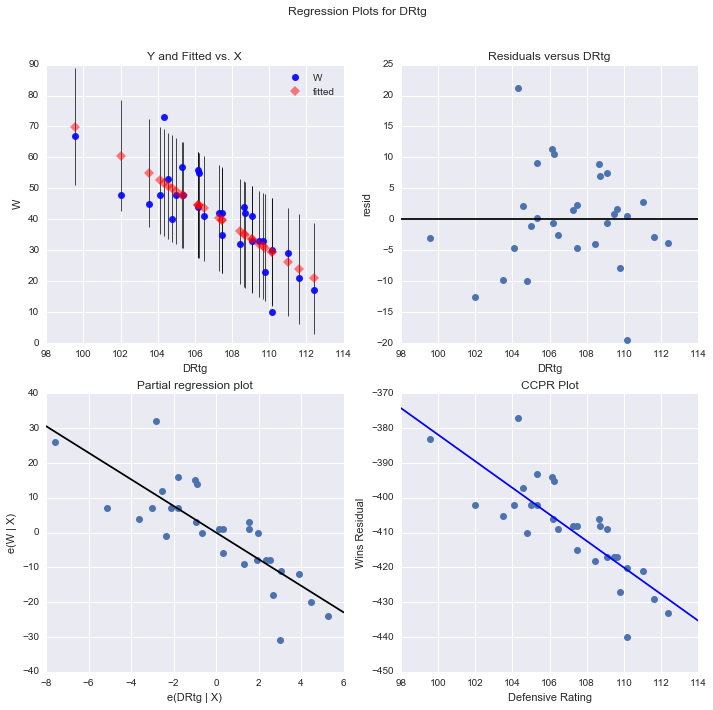

In [24]:
fig = plt.figure(figsize=(10,10))
fig = sm.graphics.plot_regress_exog(regDef, "DRtg", fig=fig)
plt.xlabel('Defensive Rating')
plt.ylabel('Wins Residual')

Here's a histogram of the residuals.

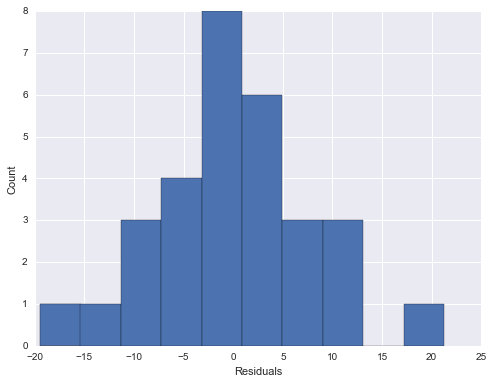

In [66]:
plt.figure(figsize=(8,6))
plt.hist(regDef.resid)
plt.xlabel('Residuals')
plt.ylabel('Count')

And here's a plot of the regression line and confidence interval.

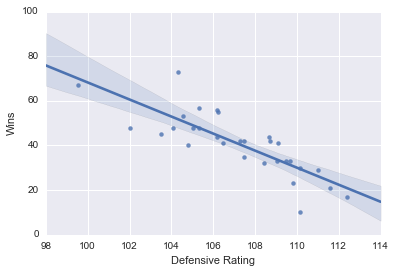

In [42]:
sns.regplot(x=df['DRtg'], y=df['W'])
plt.xlabel('Defensive Rating')
plt.ylabel('Wins')

### Removing the two major outliers

The Warriors and the 76ers.

In [43]:
no_outliers = df[df['Team'] != 'Golden State Warriors']
no_outliers = no_outliers[no_outliers['Team'] != 'Philadelphia 76ers']

Rerun the regression.

In [44]:
x = no_outliers['DRtg']
y = no_outliers['W']

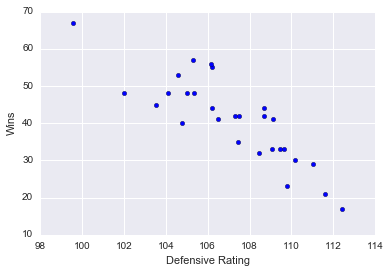

In [45]:
plt.scatter(x, y)
plt.xlabel('Defensive Rating')
plt.ylabel('Wins')

In [48]:
regDef_clean = ols("W ~ DRtg", data=no_outliers).fit()

In [58]:
print regDef_clean.summary()

                            OLS Regression Results                            
Dep. Variable:                      W   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     69.10
Date:                Tue, 20 Sep 2016   Prob (F-statistic):           8.55e-09
Time:                        14:18:19   Log-Likelihood:                -89.584
No. Observations:                  28   AIC:                             183.2
Df Residuals:                      26   BIC:                             185.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    396.6051     42.798      9.267      0.0

Removing the two outliers decreased the slope by .5, increased the R^2 by 6%, lowered the P value, and lowered the standard error by .1.

Let's plot the new regression.

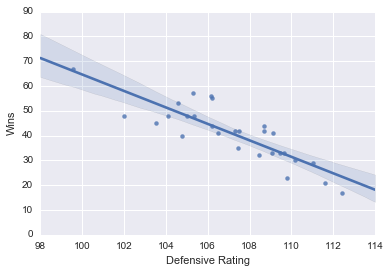

In [61]:
sns.regplot(x=x, y=y)
plt.xlabel('Defensive Rating')
plt.ylabel('Wins')

...and the new residuals.

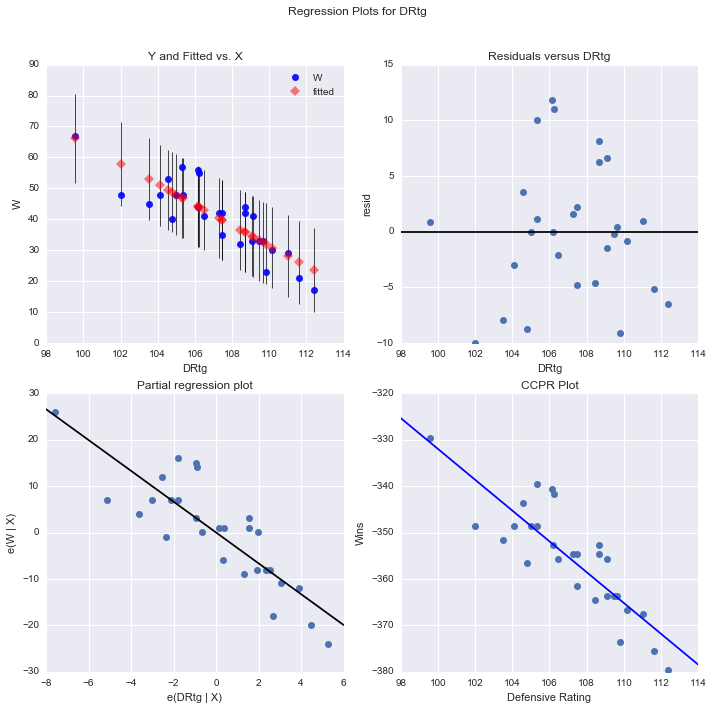

In [62]:
fig = plt.figure(figsize=(10,10))
fig = sm.graphics.plot_regress_exog(regDef_clean, "DRtg", fig=fig)
plt.xlabel('Defensive Rating')
plt.ylabel('Wins')

Now let's check out a histogram of the new residuals.

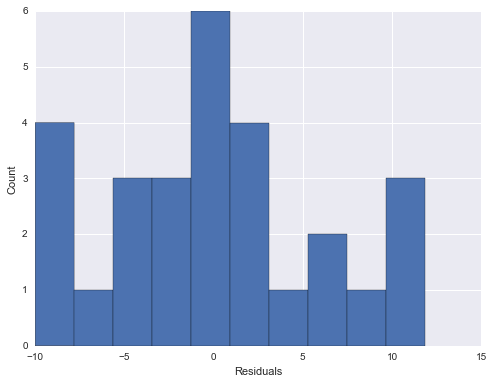

In [64]:
plt.figure(figsize=(8,6))
plt.hist(regDef_clean.resid)
plt.xlabel("Residuals")
plt.ylabel("Count")